In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\user\Documents\Projects ML\KNN project\diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the describe function we see that there are many 0 values which does not make sense .
So it is better to replace 0's with NAN because after that we can easily replace the null values by suitable values

In [5]:
data_ = data.copy(deep=True)

In [6]:
data_[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [7]:
data_.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

## To fill these nan values the data distribution needs to be understood

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

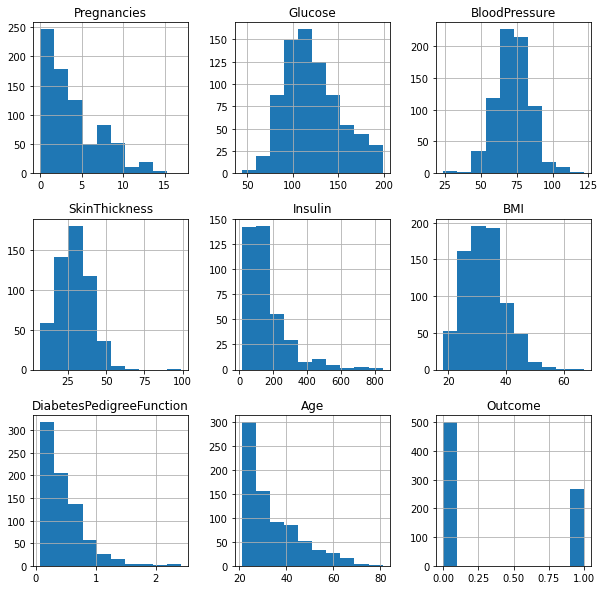

In [8]:
data_.hist(figsize = (10,10))

Now according to the distribution we will replace nan values.

In [9]:
data_['Glucose'].fillna(data_['Glucose'].mean(),inplace=True)

data_['BloodPressure'].fillna(data_['BloodPressure'].mean(),inplace=True)

data_['SkinThickness'].fillna(data_['SkinThickness'].median(),inplace=True)

data_['Insulin'].fillna(data_['Insulin'].median(),inplace=True)

data_['BMI'].fillna(data_['BMI'].median(),inplace=True)

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

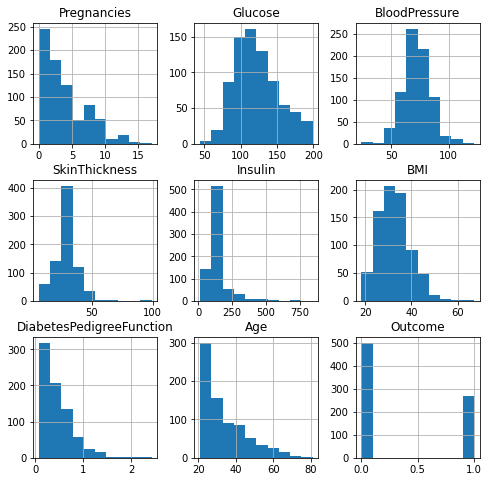

In [10]:
#Plotting after the removal of nan values
data_.hist(figsize=(8,8))

In [11]:
data_.shape

(768, 9)

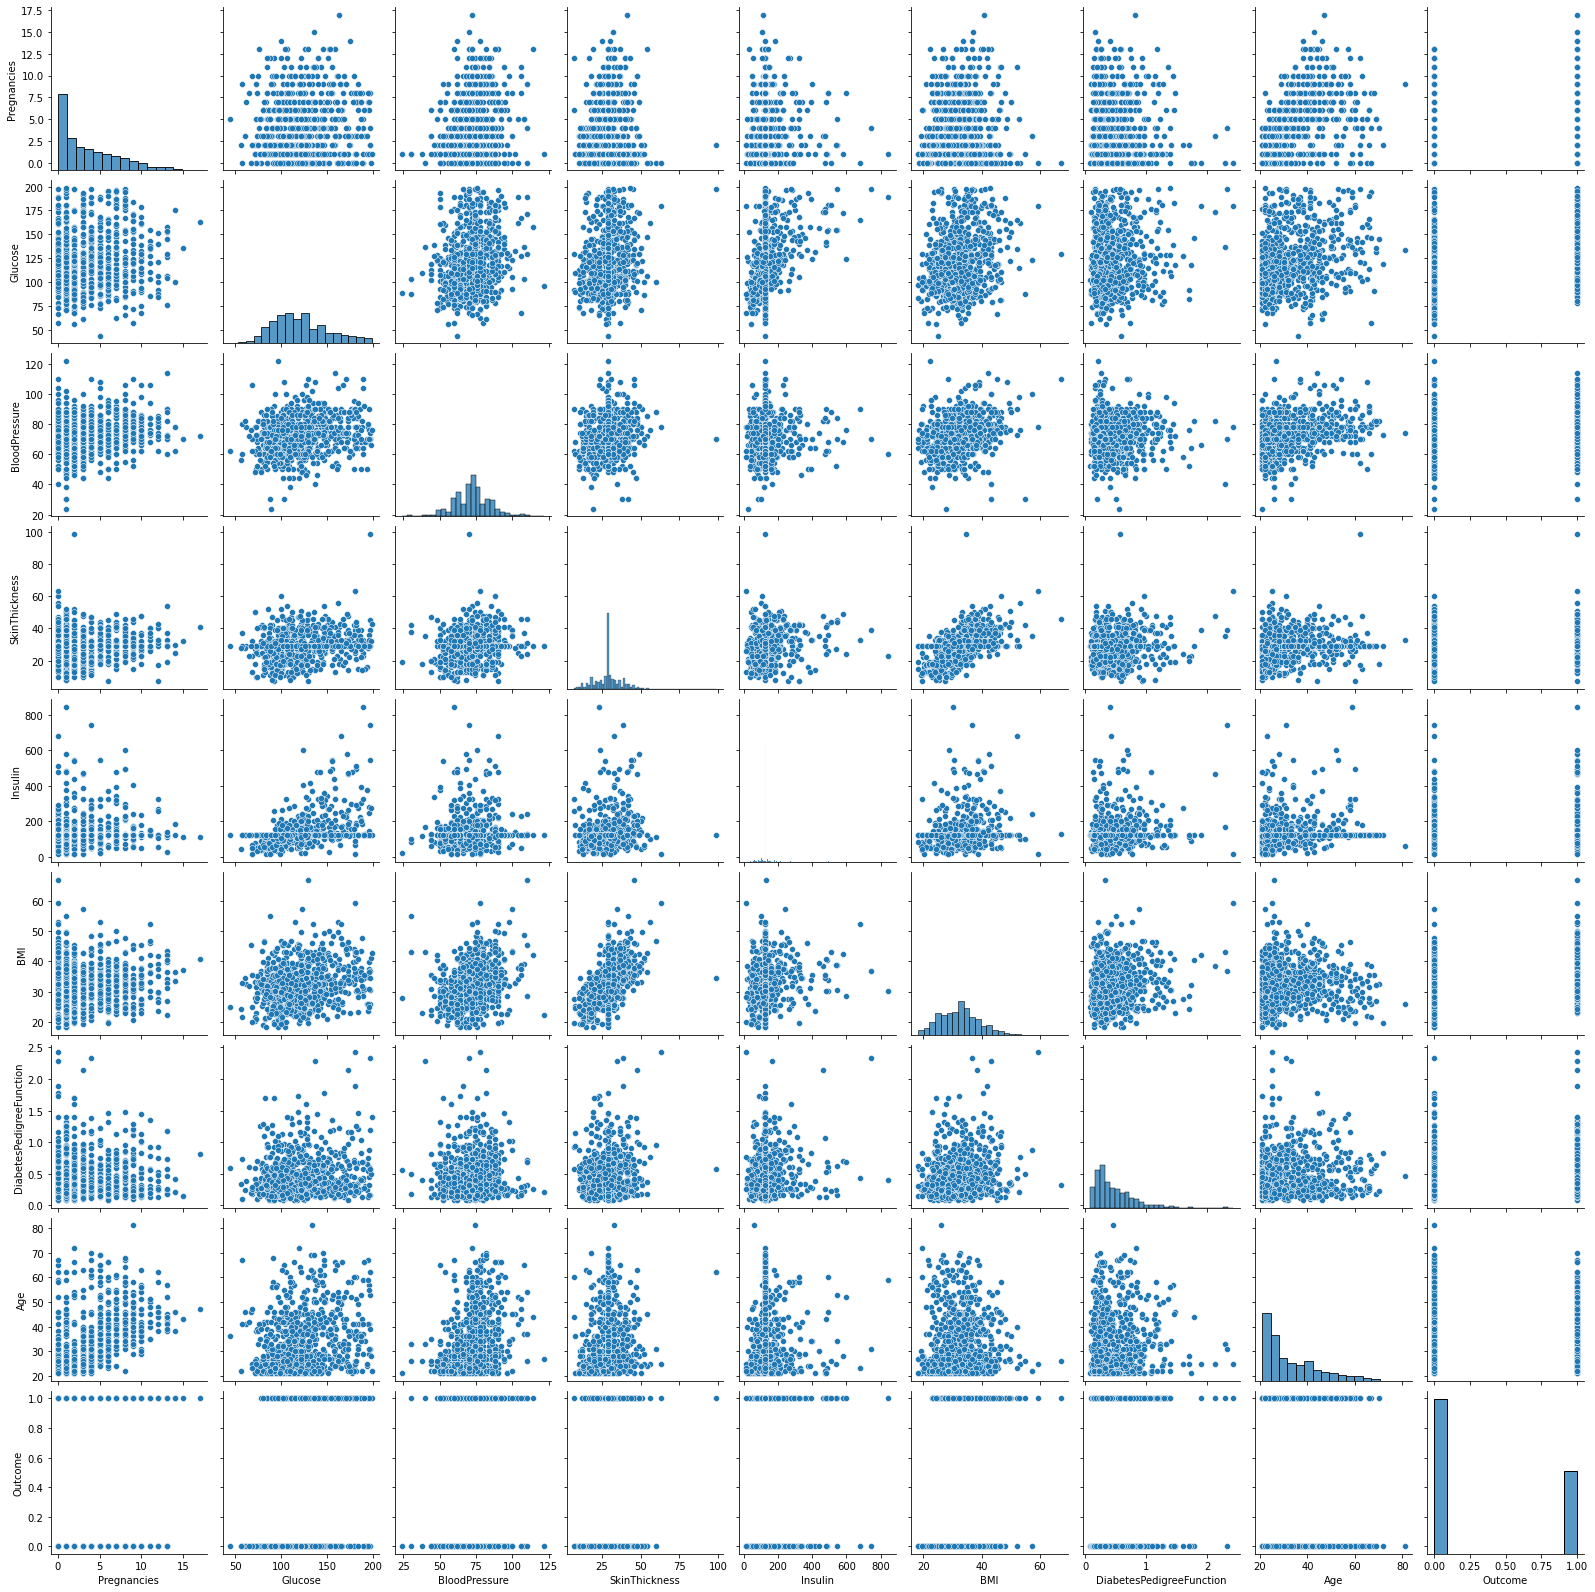

In [12]:
#By using pairplot we can quickly see how all the variables are related.This can tell us about
#what variables are useful
sns.pairplot(data_)

### We can use pairplot only in low dimensional data bcoz in high dimensional data it is not possible to plot all the plots . so we use the techniques like PCA,t-SNE in high dimension data 

<AxesSubplot:>

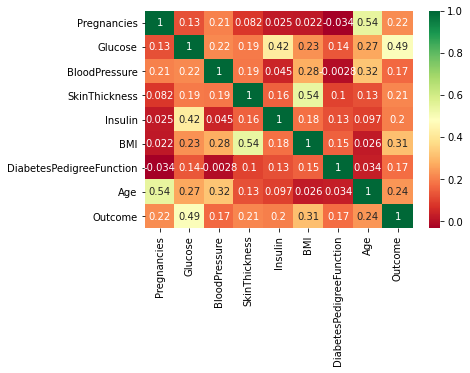

In [13]:
sns.heatmap(data_.corr(),annot=True,cmap='RdYlGn')

# Scaling our data

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [24]:
X = pd.DataFrame(sc.fit_transform(data_.drop(['Outcome'],axis=1),),columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])

In [25]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [26]:
Y.shape

(768,)

# Scaling the data

### It is always required to apply feature scaling in distance based algorithms like KNN

In [30]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=1/3,random_state=42,stratify=Y)
#Stratify parameter makes a split into so that the proportion of vales should be same. 

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_score

test_scores = []
train_scores = []

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,Y_train)
    train_scores.append(knn.score(X_train,Y_train))
    test_scores.append(knn.score(X_test,Y_test))

In [38]:
max(test_scores)*100

76.5625

In [40]:
max(train_scores)*100

100.0

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


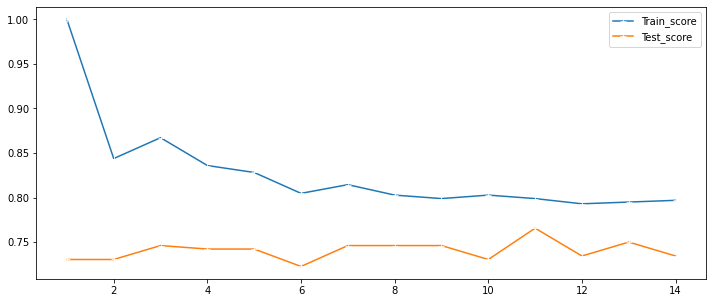

In [44]:
# Result Visualization

plt.figure(figsize=(12,5))
a = sns.lineplot(range(1,15),train_scores,marker='+',label='Train_score')
b = sns.lineplot(range(1,15),test_scores,marker='+',label='Test_score')

### So we can say that the best result is captured at k = 11 which we will use for our final model

In [51]:
#Now finalize the model
knn = KNeighborsClassifier(11)

knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)


In [52]:
knn.score(X_test,Y_test)

0.765625

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[142,  25],
       [ 35,  54]], dtype=int64)

In [56]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256

